<a href="https://colab.research.google.com/github/Pedro184294/Challenge-sprint-1---SERS/blob/main/Checkpoint_2_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercício 1 — Classificação (Radiação Solar)**

Colunas disponíveis: ['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet']
     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  

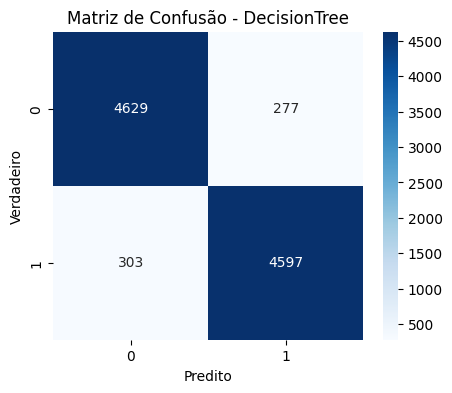


== Resultado: RandomForest ==
Acurácia: 0.9470732204772588
Classification Report:
               precision    recall  f1-score   support

           0     0.9295    0.9676    0.9482      4906
           1     0.9662    0.9265    0.9459      4900

    accuracy                         0.9471      9806
   macro avg     0.9478    0.9471    0.9470      9806
weighted avg     0.9478    0.9471    0.9471      9806



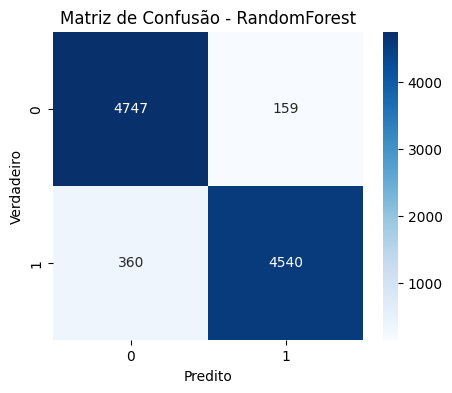


== Resultado: SVM ==
Acurácia: 0.8526412400571078
Classification Report:
               precision    recall  f1-score   support

           0     0.7933    0.9541    0.8663      4906
           1     0.9424    0.7510    0.8359      4900

    accuracy                         0.8526      9806
   macro avg     0.8678    0.8526    0.8511      9806
weighted avg     0.8678    0.8526    0.8511      9806



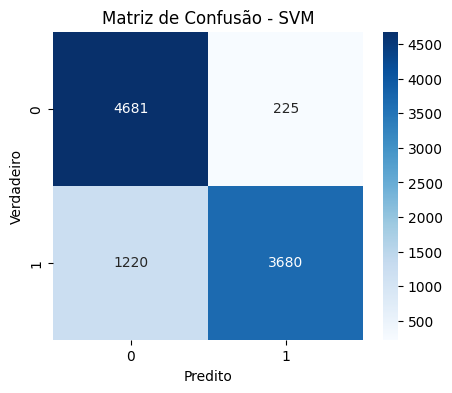

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Carregar o dataset
CSV_FILE = "SolarPrediction.csv"
df = pd.read_csv(CSV_FILE)

# Exibir as primeiras linhas para verificar colunas
print("Colunas disponíveis:", df.columns.tolist())
print(df.head())

# 2) Escolher features e target
radiacao_col = "Radiation"

if radiacao_col not in df.columns:
    raise KeyError(f"Coluna de radiação '{radiacao_col}' não encontrada. Ajuste radiacao_col.")

# Criar alvo binário usando a mediana
df = df.dropna(subset=[radiacao_col])
mediana = df[radiacao_col].median()
df["alta_radiacao"] = (df[radiacao_col] > mediana).astype(int)  # 1=Alta, 0=Baixa
print(f"Mediana de radiação: {mediana:.3f} -> 1 = acima da mediana")

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = [c for c in numerical_cols if c not in [radiacao_col, "alta_radiacao"]]

X = df[features].copy()
y = df["alta_radiacao"]

print("Features usadas:", features)

# 3) Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Train/test sizes:", X_train.shape, X_test.shape)


# 4) Normalização (se necessário)
#    — SVM costuma se beneficiar de escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5) Treinar 3 modelos
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=False, random_state=42)
}

trained = {}
for name, model in models.items():
    # SVM precisa dos dados escalados; DecisionTree e RF não exigem, mas escala não prejudica
    model.fit(X_train_scaled, y_train)
    trained[name] = model
    print(f"Treinado: {name}")

# 6) Avaliação
def avaliar(model, Xs, ys, name):
    ypred = model.predict(Xs)
    acc = accuracy_score(ys, ypred)
    cm = confusion_matrix(ys, ypred)
    print(f"\n== Resultado: {name} ==")
    print("Acurácia:", acc)
    print("Classification Report:\n", classification_report(ys, ypred, digits=4))
    # Plot matriz de confusão
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

for name, model in trained.items():
    avaliar(model, X_test_scaled, y_test, name)

**Exercício 2 — Regressão (Potência de turbina eólica)**

['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
Features usadas: ['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
Train/test sizes: (40424, 3) (10106, 3)
Treinado: LinearRegression
Treinado: DecisionTree
Tr

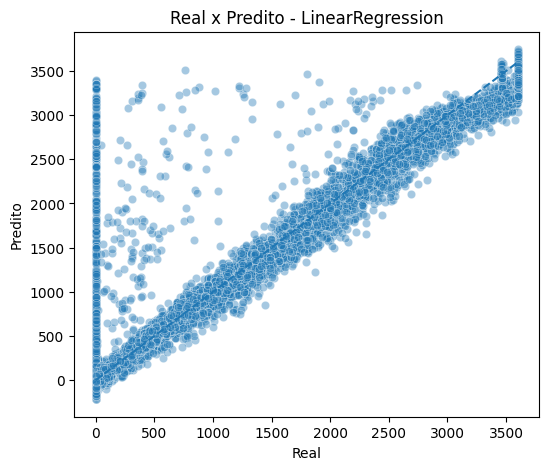


== Resultado: DecisionTree ==
RMSE: 538.7904
R^2 : 0.8299


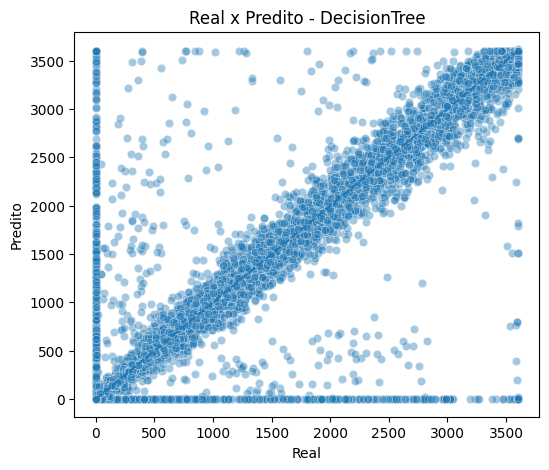


== Resultado: RandomForest ==
RMSE: 412.8221
R^2 : 0.9001


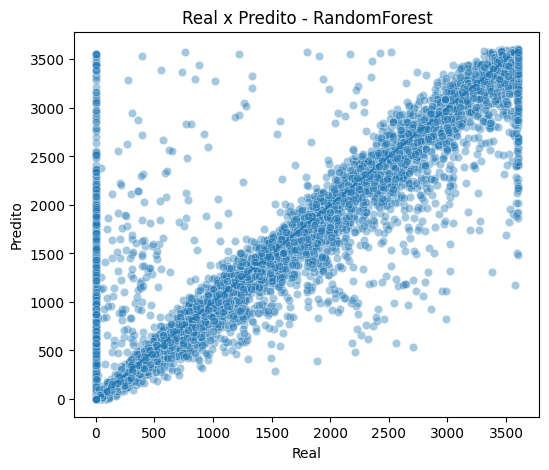

In [7]:

import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Carregar dataset
CSV_FILE = "T1.csv"
df = pd.read_csv(CSV_FILE)
print(df.columns.tolist())
print(df.head())

# 2) Selecionar features e target
target_col = "LV ActivePower (kW)"

if target_col not in df.columns:
    raise KeyError(f"Coluna alvo '{target_col}' não encontrada. Ajuste target_col.")

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = [c for c in numerical_cols if c != target_col]


X = df[features].copy()
y = df[target_col].copy()

print("Features usadas:", features)

# 3) Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train/test sizes:", X_train.shape, X_test.shape)

# 4) Normalização (recomendado para Regressão Linear)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5) Treinar modelos
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

trained = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained[name] = model
    print(f"Treinado: {name}")


# 6) Avaliação: RMSE e R^2
def avaliar_reg(model, Xs, ys, name):
    ypred = model.predict(Xs)
    rmse = sqrt(mean_squared_error(ys, ypred))   # <-- aqui corrige
    r2 = r2_score(ys, ypred)
    print(f"\n== Resultado: {name} ==")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2 : {r2:.4f}")
    # plot reais vs preditos
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=ys, y=ypred, alpha=0.4)
    plt.plot([ys.min(), ys.max()], [ys.min(), ys.max()], linestyle='--')
    plt.xlabel('Real')
    plt.ylabel('Predito')
    plt.title(f'Real x Predito - {name}')
    plt.show()

for name, model in trained.items():
    avaliar_reg(model, X_test_scaled, y_test, name)